<a href="https://colab.research.google.com/github/Tayen15/machine-learning-task/blob/main/praktikum-7/notebook/praktikum07-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 7 - Regresi OLS (Ordinary Least Squares)
## Analisis Dataset Satelit

Dataset: `dataset_satelit.csv`
- **Variabel**: Data satelit dengan berbagai fitur seperti koordinat, nutrisi tanah (N, P, K, Ca, Mg, dll), dan band satelit
- **Tujuan**: Membangun model regresi OLS untuk prediksi

## 1. Import Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from scipy import stats

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Konfigurasi display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Library berhasil diimport!")

✓ Library berhasil diimport!


## 2. Load dan Eksplorasi Dataset

In [75]:
# Load dataset
df = pd.read_csv('../data/dataset_satelit.csv')

print("="*70)
print("INFORMASI DATASET")
print("="*70)
print(f"Shape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nNama kolom:")
print(df.columns.tolist())
print("\n" + "="*70)
print("5 Baris Pertama:")
print("="*70)
df.head()

INFORMASI DATASET
Shape dataset: (594, 34)
Jumlah baris: 594
Jumlah kolom: 34

Nama kolom:
['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5', 'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe', 'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']

5 Baris Pertama:


,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,Cu,Zn,B,b12,b11,b9,b8a,b8,b7,b6,b5,b4,b3,b2,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,5.60,16.69,26.58,0.1013,0.1922,0.4753,0.3354,0.2930,0.3066,0.0897,0.2467,0.0432,0.0548,0.0337,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,0.65,14.47,13.60,0.1057,0.1941,0.4811,0.3208,0.2828,0.2953,0.0939,0.2385,0.0626,0.0677,0.0445,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,2.82,14.75,29.31,0.0836,0.1750,0.4981,0.3655,0.3166,0.3346,0.0866,0.2599,0.0444,0.0622,0.0403,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,2.53,15.32,20.24,0.0818,0.1740,0.4603,0.3671,0.3256,0.3386,0.0883,0.2656,0.0406,0.0594,0.0373,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,1.51,15.82,27.59,0.0725,0.1598,0.4655,0.3600,0.2918,0.3324,0.0882,0.2625,0.0364,0.0559,0.0336,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [76]:
# Info dataset
print("="*70)
print("INFORMASI TIPE DATA")
print("="*70)
df.info()
print("\n" + "="*70)
print("STATISTIK DESKRIPTIF")
print("="*70)
display(df.describe())

INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    flo

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,Zn,B,b12,b11,b9,b8a,b8,b7,b6,b5,b4,b3,b2,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,594.00000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,14.86032,13.497424,0.123459,0.149183,9.393151,9.179063,9.099435,0.303813,0.183268,0.244472,0.098815,0.121677,0.135155,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,8.25804,5.590052,0.059210,0.087096,16.479313,16.608000,16.494527,0.109674,0.141562,0.110503,0.106883,0.110718,0.124041,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,0.53000,2.640000,0.032200,0.016730,0.164700,0.107200,0.095800,0.098200,0.019560,0.039800,0.018100,0.018600,0.013100,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,9.72500,8.705000,0.084675,0.066625,0.393650,0.348125,0.312825,0.200300,0.073325,0.139050,0.042902,0.062200,0.047600,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,13.51000,12.910000,0.106250,0.172350,0.523450,0.403450,0.372000,0.329000,0.117700,0.260145,0.054750,0.080700,0.068150,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,17.78250,17.485000,0.153045,0.194875,1.579400,0.486025,0.463900,0.380775,0.312100,0.311560,0.084600,0.118000,0.179200,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,57.55000,31.510000,0.377700,0.538300,45.824960,45.850970,40.208240,0.781400,0.775100,0.794900,0.754400,0.799200,0.828800,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [77]:
# Cek missing values
print("="*70)
print("MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ Tidak ada missing values dalam dataset")
else:
    print(missing[missing > 0])

MISSING VALUES
K    1
dtype: int64


## 2.1. Visualisasi Korelasi Antar Variabel

In [78]:
# Hitung korelasi untuk fitur numerik
corr_matrix = df.corr(numeric_only=True)

# Tampilkan korelasi dengan target N
print("="*70)
print("KORELASI DENGAN TARGET (N - Nitrogen)")
print("="*70)
corr_with_target = corr_matrix['N'].sort_values(ascending=False)
print(corr_with_target)
print("="*70)

KORELASI DENGAN TARGET (N - Nitrogen)
N            1.000000
Lattitude    0.742794
P            0.643212
b9           0.535288
b8a          0.528105
b8           0.526838
Sigma_VH     0.503636
Sigma_VV     0.454871
Mn           0.383059
b5           0.376916
Fe           0.338775
b1           0.312106
Zn           0.186446
B            0.122336
b12          0.098796
b2           0.064155
No           0.057689
Ca           0.035696
Cu           0.028677
b4          -0.126046
b3          -0.137538
K           -0.138219
b7          -0.333109
beta0_vv    -0.424251
b11         -0.462297
b6          -0.509165
gamma0_vv   -0.517893
beta0_vh    -0.520638
gamma0_vh   -0.540866
plia        -0.592965
lia         -0.593177
iafe        -0.593590
Longitude   -0.695291
Name: N, dtype: float64


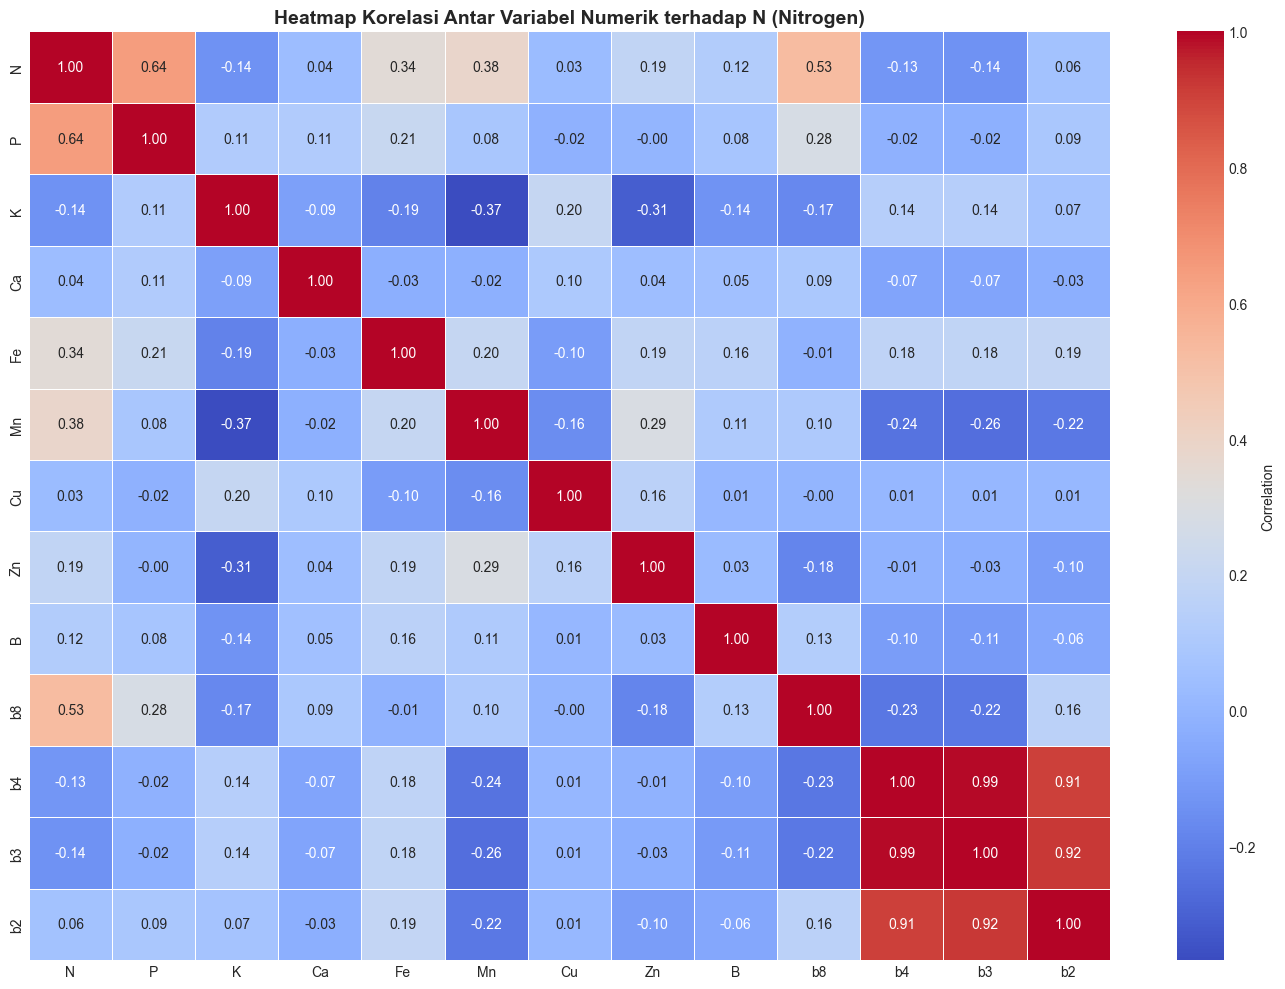

In [79]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 10))
# Pilih subset fitur yang relevan untuk visualisasi (exclude Mg karena berisi string)
relevant_features = ['N', 'P', 'K', 'Ca', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'b8', 'b4', 'b3', 'b2']
corr_subset = df[relevant_features].corr(numeric_only=True)

sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap N (Nitrogen)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Persiapan Data untuk Regresi OLS

Untuk contoh ini, kita akan memprediksi **N (Nitrogen)** menggunakan beberapa fitur penting seperti P, K, Ca, Mg, dan beberapa band satelit.

In [80]:
# Pilih fitur untuk model
# Target: N (Nitrogen)
# Features: P, K, Ca, Mg, Fe, b8, b4, b3, b2

target = 'N'
features = ['P', 'K', 'Ca', 'Mg', 'Fe', 'b8', 'b4', 'b3', 'b2']

# Pisahkan fitur (X) dan target (y)
X = df[features]
y = df[target]

print("="*70)
print("VARIABEL MODEL")
print("="*70)
print(f"Target variabel (y): {target}")
print(f"Jumlah fitur (X): {len(features)}")
print(f"Fitur yang digunakan:")
for i, feat in enumerate(features, 1):
    print(f"  {i}. {feat}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
print("="*70)

VARIABEL MODEL
Target variabel (y): N
Jumlah fitur (X): 9
Fitur yang digunakan:
  1. P
  2. K
  3. Ca
  4. Mg
  5. Fe
  6. b8
  7. b4
  8. b3
  9. b2

Shape X: (594, 9)
Shape y: (594,)


## 4. Split Data (Training & Testing)

In [81]:
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("="*70)
print("SPLIT DATASET")
print("="*70)
print(f"Total data: {len(X)}")
print(f"Data training: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Data testing: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print("="*70)

SPLIT DATASET
Total data: 594
Data training: 475 (80.0%)
Data testing: 119 (20.0%)


## 5. Membangun Model Regresi OLS dengan Statsmodels

In [82]:
# Convert Mg column to numeric, handling any non-numeric values
X_train_numeric = X_train.copy()
X_test_numeric = X_test.copy()

# Convert Mg to numeric, replacing any non-numeric values with NaN
X_train_numeric['Mg'] = pd.to_numeric(X_train_numeric['Mg'], errors='coerce')
X_test_numeric['Mg'] = pd.to_numeric(X_test_numeric['Mg'], errors='coerce')

# Handle missing values in all columns (K has 1 missing value)
for col in X_train_numeric.columns:
	if X_train_numeric[col].isnull().any():
		col_mean = X_train_numeric[col].mean()
		X_train_numeric[col] = X_train_numeric[col].fillna(col_mean)
		X_test_numeric[col] = X_test_numeric[col].fillna(col_mean)  # Use training mean for test set

# Tambahkan konstanta untuk intercept
X_train_const = sm.add_constant(X_train_numeric)
X_test_const = sm.add_constant(X_test_numeric)

# Bangun model OLS
ols_model = sm.OLS(y_train, X_train_const)
ols_results = ols_model.fit()

print("="*70)
print("MODEL OLS BERHASIL DIBANGUN!")
print("="*70)
print(f"Jumlah observasi training: {ols_results.nobs}")
print(f"Jumlah parameter: {len(ols_results.params)}")
print("="*70)

MODEL OLS BERHASIL DIBANGUN!
Jumlah observasi training: 475.0
Jumlah parameter: 10


## 6. Summary Model OLS

In [83]:
# Tampilkan summary lengkap model OLS
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     92.85
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.08e-98
Time:                        09:37:28   Log-Likelihood:                 10.983
No. Observations:                 475   AIC:                            -1.966
Df Residuals:                     465   BIC:                             39.67
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8252      0.103      8.023      0.0

## 7. Koefisien Model

In [84]:
# Tampilkan koefisien dalam bentuk DataFrame
coef_df = pd.DataFrame({
    'Feature': ols_results.params.index,
    'Coefficient': ols_results.params.values,
    'Std Error': ols_results.bse.values,
    'P-value': ols_results.pvalues.values
})

print("="*70)
print("KOEFISIEN REGRESI OLS")
print("="*70)
print(coef_df.to_string(index=False))
print("="*70)

# Interpretasi koefisien
print("\n" + "="*70)
print("INTERPRETASI KOEFISIEN:")
print("="*70)
print("Koefisien menunjukkan perubahan nilai N untuk setiap perubahan")
print("satu unit pada fitur tersebut (dengan fitur lain tetap konstan).\n")
for idx, row in coef_df.iterrows():
    if row['Feature'] != 'const':
        if row['P-value'] < 0.05:
            sig = "✓ Signifikan"
        else:
            sig = "✗ Tidak signifikan"
        print(f"{row['Feature']:8} : {row['Coefficient']:8.4f} - {sig} (p={row['P-value']:.4f})")
print("="*70)

KOEFISIEN REGRESI OLS
Feature  Coefficient  Std Error      P-value
  const     0.825179   0.102856 8.496641e-15
      P    10.536880   0.626464 6.192038e-50
      K    -0.172580   0.058416 3.292629e-03
     Ca    -0.066320   0.029759 2.631892e-02
     Mg    -0.109674   0.080924 1.759885e-01
     Fe     0.001625   0.000226 2.659513e-12
     b8     0.012420   0.002397 3.301928e-07
     b4     3.302654   0.901472 2.772891e-04
     b3    -1.922195   1.317698 1.453083e-01
     b2    -1.334027   0.801973 9.689980e-02

INTERPRETASI KOEFISIEN:
Koefisien menunjukkan perubahan nilai N untuk setiap perubahan
satu unit pada fitur tersebut (dengan fitur lain tetap konstan).

P        :  10.5369 - ✓ Signifikan (p=0.0000)
K        :  -0.1726 - ✓ Signifikan (p=0.0033)
Ca       :  -0.0663 - ✓ Signifikan (p=0.0263)
Mg       :  -0.1097 - ✗ Tidak signifikan (p=0.1760)
Fe       :   0.0016 - ✓ Signifikan (p=0.0000)
b8       :   0.0124 - ✓ Signifikan (p=0.0000)
b4       :   3.3027 - ✓ Signifikan (p=0.0003)
b

## 8. Prediksi dan Evaluasi Model

In [85]:
# Prediksi pada data training dan testing
y_train_pred = ols_results.predict(X_train_const)
y_test_pred = ols_results.predict(X_test_const)

# Hitung metrik evaluasi untuk training
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Hitung metrik evaluasi untuk testing
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Tampilkan hasil evaluasi
print("="*70)
print("EVALUASI MODEL REGRESI OLS")
print("="*70)
print("\n📊 TRAINING SET:")
print(f"  R² Score       : {train_r2:.4f}")
print(f"  MSE            : {train_mse:.4f}")
print(f"  RMSE           : {train_rmse:.4f}")
print(f"  MAE            : {train_mae:.4f}")

print("\n📊 TESTING SET:")
print(f"  R² Score       : {test_r2:.4f}")
print(f"  MSE            : {test_mse:.4f}")
print(f"  RMSE           : {test_rmse:.4f}")
print(f"  MAE            : {test_mae:.4f}")

print("\n" + "="*70)
print("INTERPRETASI R² Score:")
print("="*70)
print(f"Model dapat menjelaskan {train_r2*100:.2f}% variasi N pada data training")
print(f"Model dapat menjelaskan {test_r2*100:.2f}% variasi N pada data testing")
print("="*70)

EVALUASI MODEL REGRESI OLS

📊 TRAINING SET:
  R² Score       : 0.6425
  MSE            : 0.0559
  RMSE           : 0.2364
  MAE            : 0.1849

📊 TESTING SET:
  R² Score       : 0.5659
  MSE            : 0.0657
  RMSE           : 0.2564
  MAE            : 0.1754

INTERPRETASI R² Score:
Model dapat menjelaskan 64.25% variasi N pada data training
Model dapat menjelaskan 56.59% variasi N pada data testing


## 9. Visualisasi Hasil Prediksi

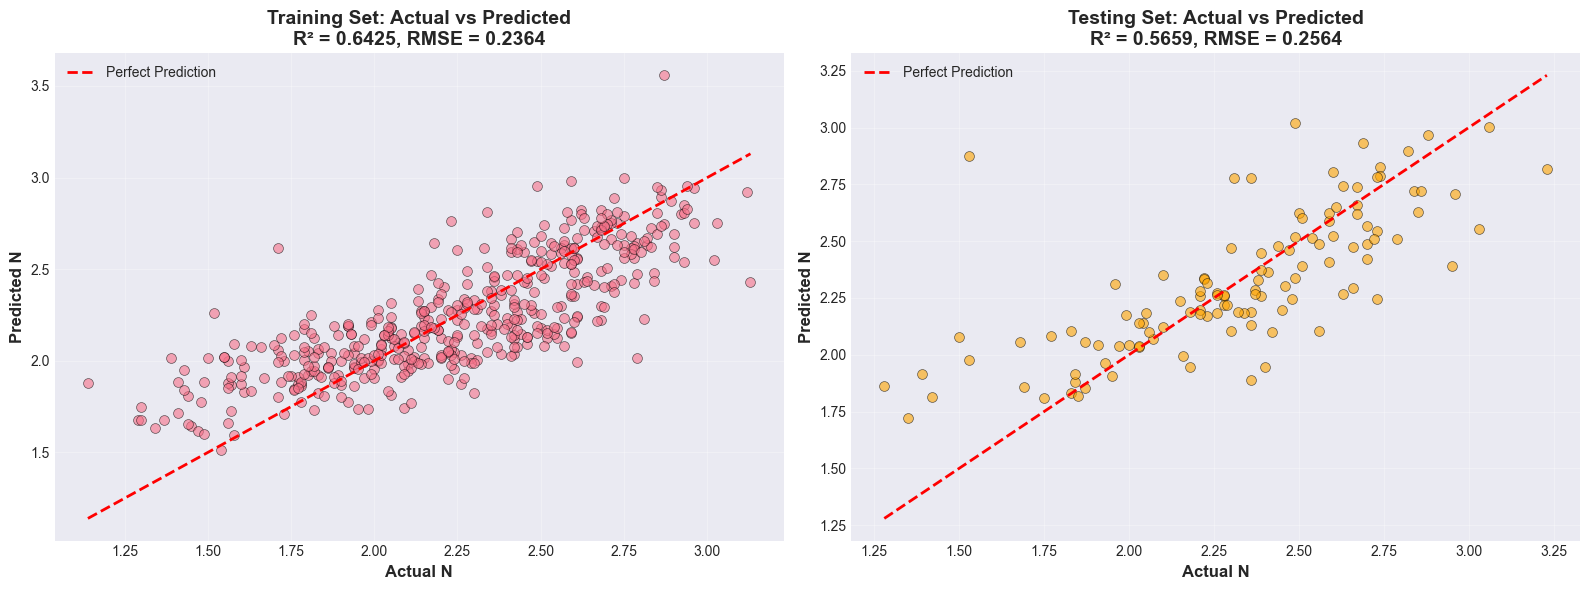

In [86]:
# Visualisasi Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot untuk Training Data
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual N', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted N', fontsize=12, fontweight='bold')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}, RMSE = {train_rmse:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot untuk Testing Data
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=50, color='orange', 
                edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual N', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted N', fontsize=12, fontweight='bold')
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}, RMSE = {test_rmse:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Visualisasi Residual Analysis

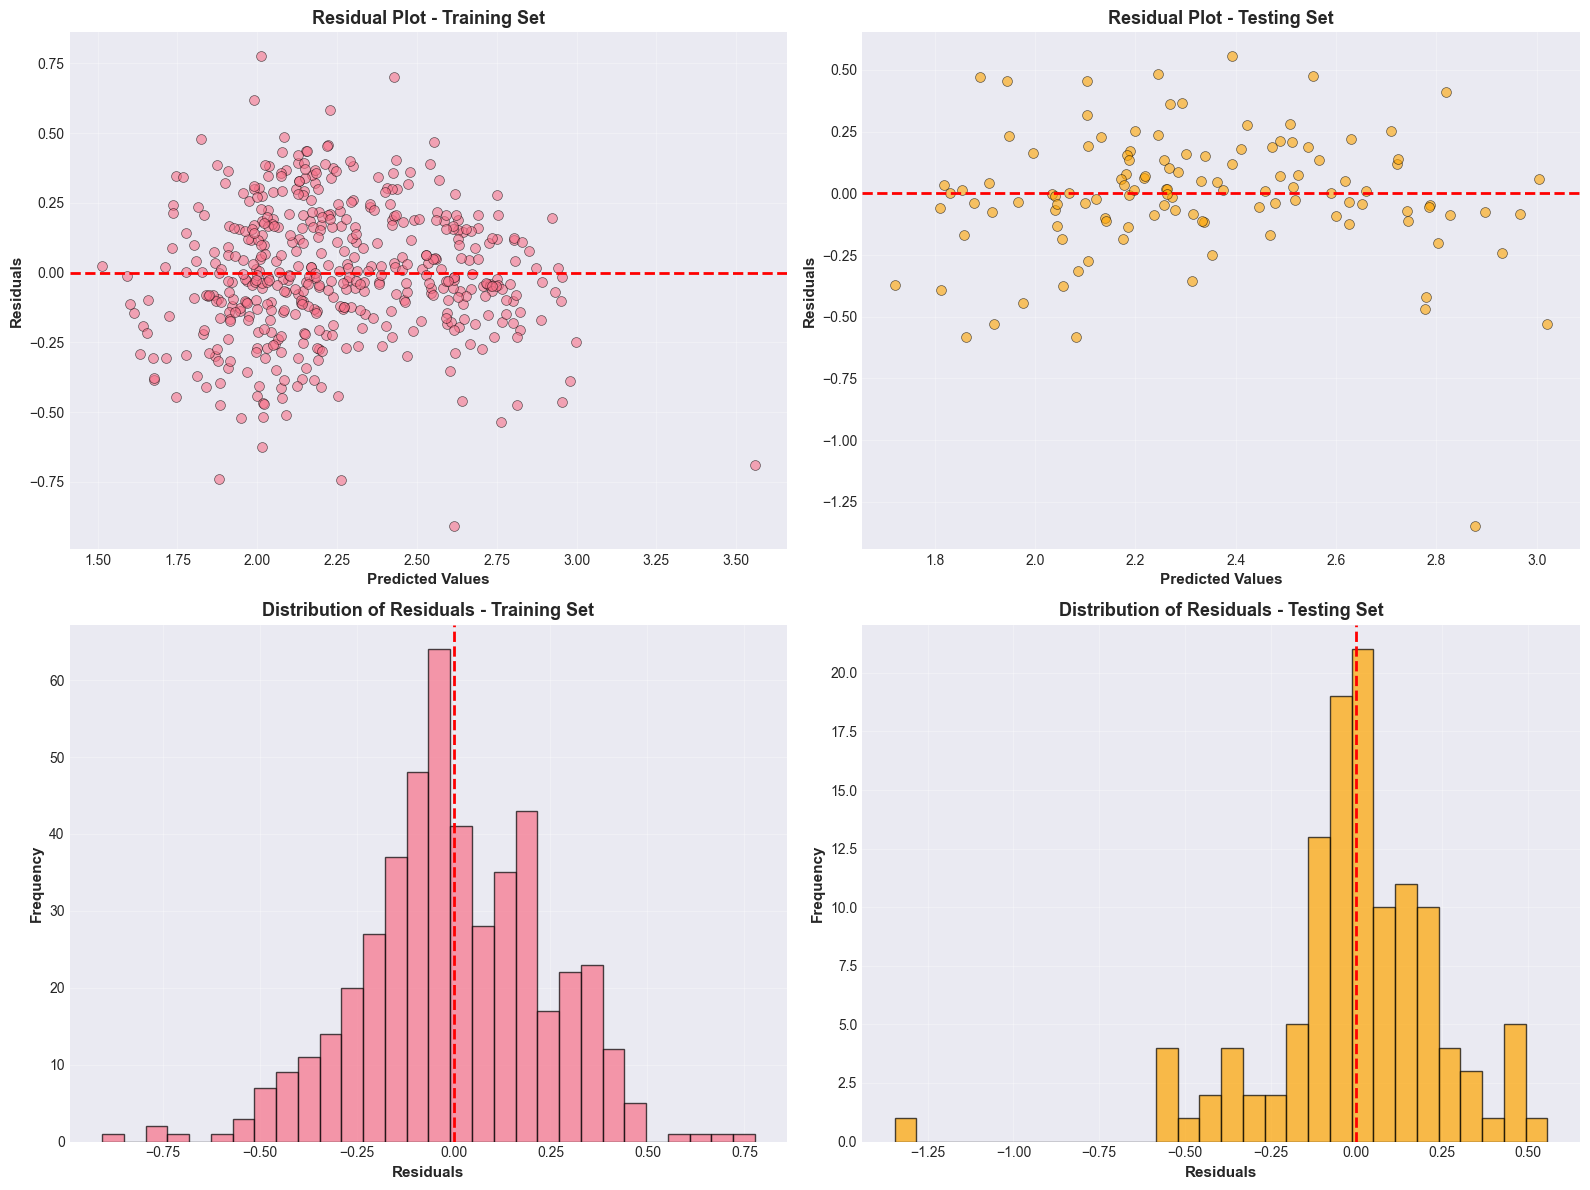

In [87]:
# Hitung residual
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Visualisasi residual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residual Plot - Training
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.6, s=50, 
                   edgecolors='black', linewidth=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Residual Plot - Training Set', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot - Testing
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, s=50, 
                   color='orange', edgecolors='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Residual Plot - Testing Set', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals - Training
axes[1, 0].hist(train_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Residuals - Training Set', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histogram of Residuals - Testing
axes[1, 1].hist(test_residuals, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of Residuals - Testing Set', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Q-Q Plot untuk Normalitas Residual

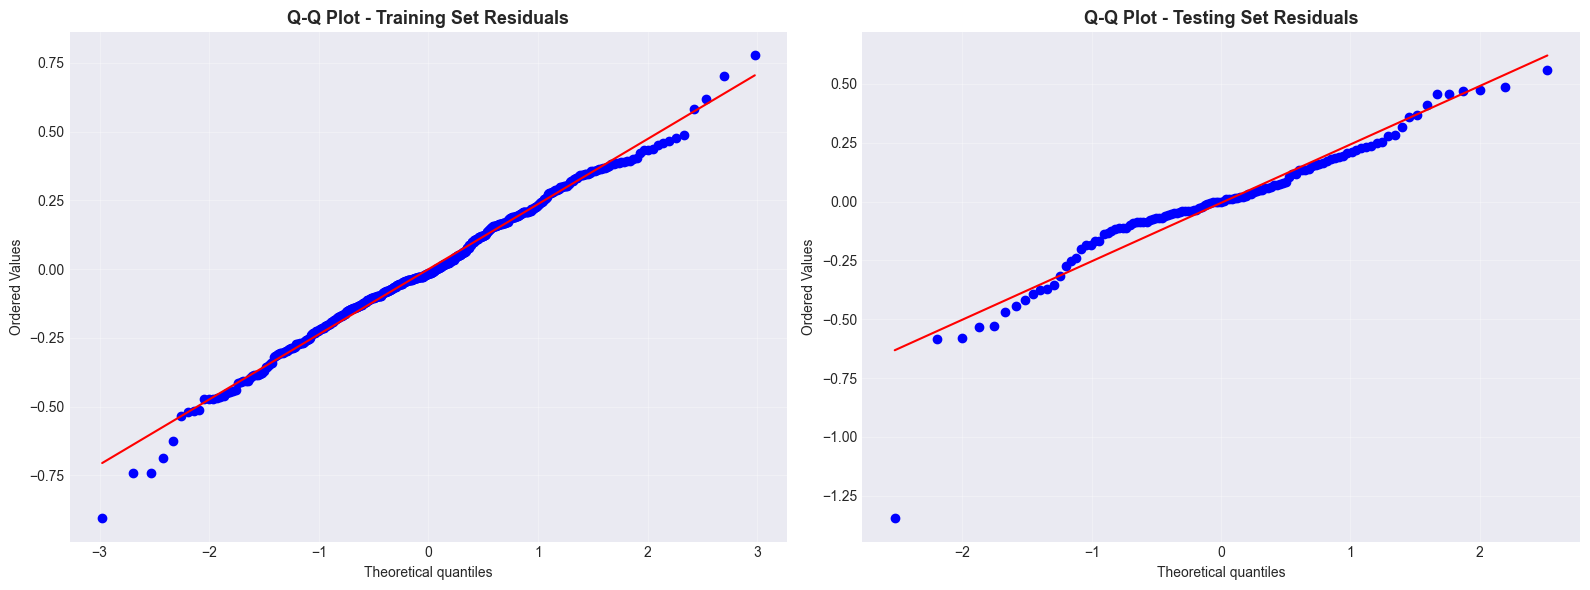


INTERPRETASI Q-Q PLOT:
Jika titik-titik mengikuti garis diagonal, maka residual
berdistribusi normal (asumsi OLS terpenuhi)


In [88]:
# Q-Q Plot untuk memeriksa normalitas residual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Q-Q Plot Training
stats.probplot(train_residuals, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot - Training Set Residuals', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Q-Q Plot Testing
stats.probplot(test_residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot - Testing Set Residuals', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETASI Q-Q PLOT:")
print("="*70)
print("Jika titik-titik mengikuti garis diagonal, maka residual")
print("berdistribusi normal (asumsi OLS terpenuhi)")
print("="*70)

## 12. Visualisasi Koefisien Regresi

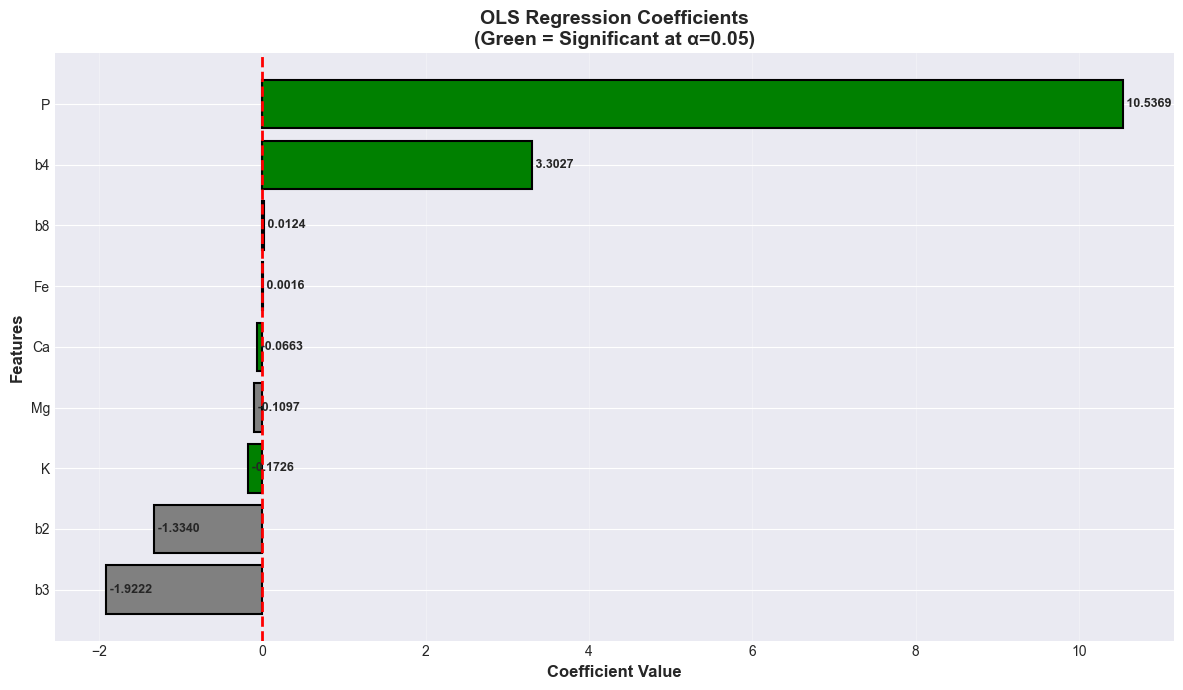

In [89]:
# Visualisasi koefisien (exclude intercept)
coef_plot = coef_df[coef_df['Feature'] != 'const'].copy()
coef_plot = coef_plot.sort_values('Coefficient')

# Plot koefisien
fig, ax = plt.subplots(figsize=(12, 7))
colors = ['green' if p < 0.05 else 'gray' for p in coef_plot['P-value']]
bars = ax.barh(coef_plot['Feature'], coef_plot['Coefficient'], color=colors, 
               edgecolor='black', linewidth=1.5)

ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('OLS Regression Coefficients\n(Green = Significant at α=0.05)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Tambahkan nilai pada bar
for i, (idx, row) in enumerate(coef_plot.iterrows()):
    ax.text(row['Coefficient'], i, f" {row['Coefficient']:.4f}", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 13. Perbandingan dengan Sklearn LinearRegression

In [90]:
# Bangun model dengan sklearn untuk perbandingan
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_numeric, y_train)

# Prediksi
sklearn_train_pred = sklearn_model.predict(X_train_numeric)
sklearn_test_pred = sklearn_model.predict(X_test_numeric)

# Evaluasi
sklearn_train_r2 = r2_score(y_train, sklearn_train_pred)
sklearn_test_r2 = r2_score(y_test, sklearn_test_pred)

print("="*70)
print("PERBANDINGAN: STATSMODELS OLS vs SKLEARN LINEAR REGRESSION")
print("="*70)
print(f"\nIntercept:")
print(f"  Statsmodels OLS    : {ols_results.params['const']:.6f}")
print(f"  Sklearn LinearReg  : {sklearn_model.intercept_:.6f}")

print(f"\nR² Score (Training):")
print(f"  Statsmodels OLS    : {train_r2:.6f}")
print(f"  Sklearn LinearReg  : {sklearn_train_r2:.6f}")
print(f"  Difference         : {abs(train_r2 - sklearn_train_r2):.6f}")

print(f"\nR² Score (Testing):")
print(f"  Statsmodels OLS    : {test_r2:.6f}")
print(f"  Sklearn LinearReg  : {sklearn_test_r2:.6f}")
print(f"  Difference         : {abs(test_r2 - sklearn_test_r2):.6f}")

print("\n" + "="*70)
print("✓ Hasil kedua metode hampir identik!")
print("  Statsmodels OLS memberikan informasi statistik lebih lengkap")
print("  Sklearn LinearRegression lebih sederhana dan cepat")
print("="*70)

PERBANDINGAN: STATSMODELS OLS vs SKLEARN LINEAR REGRESSION

Intercept:
  Statsmodels OLS    : 0.825179
  Sklearn LinearReg  : 0.825179

R² Score (Training):
  Statsmodels OLS    : 0.642476
  Sklearn LinearReg  : 0.642476
  Difference         : 0.000000

R² Score (Testing):
  Statsmodels OLS    : 0.565903
  Sklearn LinearReg  : 0.565903
  Difference         : 0.000000

✓ Hasil kedua metode hampir identik!
  Statsmodels OLS memberikan informasi statistik lebih lengkap
  Sklearn LinearRegression lebih sederhana dan cepat


## 13.1. Cross-Validation

CROSS-VALIDATION (5-FOLD)
Skor R² tiap fold: [-0.89960919 -0.48648716  0.28911963  0.0973016  -0.33815949]

Rata-rata R² Score: -0.2676
Standar deviasi   : 0.4232
Min R² Score      : -0.8996
Max R² Score      : 0.2891


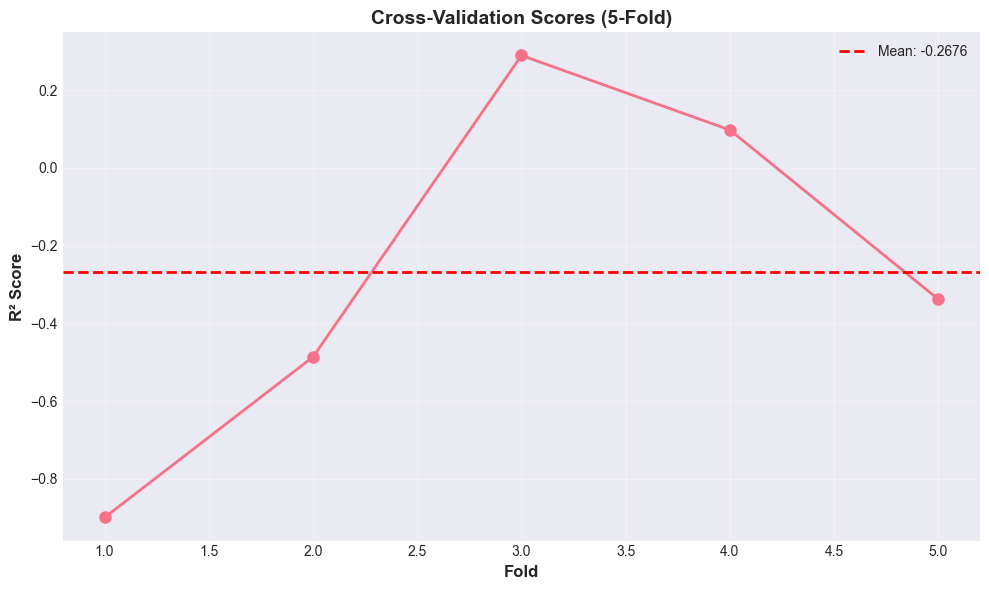

In [91]:
# Prepare clean data for cross-validation
X_clean = X.copy()
X_clean['Mg'] = pd.to_numeric(X_clean['Mg'], errors='coerce')

# Handle missing values in all columns
for col in X_clean.columns:
	if X_clean[col].isnull().any():
		col_mean = X_clean[col].mean()
		X_clean[col] = X_clean[col].fillna(col_mean)

# Lakukan cross-validation dengan 5 fold
scores = cross_val_score(sklearn_model, X_clean, y, cv=5, scoring='r2')

print("="*70)
print("CROSS-VALIDATION (5-FOLD)")
print("="*70)
print("Skor R² tiap fold:", scores)
print(f"\nRata-rata R² Score: {np.mean(scores):.4f}")
print(f"Standar deviasi   : {np.std(scores):.4f}")
print(f"Min R² Score      : {np.min(scores):.4f}")
print(f"Max R² Score      : {np.max(scores):.4f}")
print("="*70)

# Visualisasi cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.axhline(y=np.mean(scores), color='r', linestyle='--', linewidth=2, label=f'Mean: {np.mean(scores):.4f}')
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('Cross-Validation Scores (5-Fold)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 14. Kesimpulan dan Interpretasi

## 13.2. Prediksi Data Baru

In [92]:
# Contoh prediksi dengan data baru
data_baru = pd.DataFrame({
    'P': [0.15, 0.18, 0.12],
    'K': [0.45, 0.52, 0.38],
    'Ca': [0.65, 0.78, 0.55],
    'Mg': [0.72, 0.68, 0.80],
    'Fe': [95.5, 110.2, 88.3],
    'b8': [0.31, 0.29, 0.33],
    'b4': [0.045, 0.052, 0.041],
    'b3': [0.062, 0.068, 0.058],
    'b2': [0.038, 0.042, 0.035]
})

# Prediksi menggunakan model sklearn
pred_sklearn = sklearn_model.predict(data_baru)

# Prediksi menggunakan model statsmodels OLS
data_baru_const = sm.add_constant(data_baru)
pred_ols = ols_results.predict(data_baru_const)

# Tampilkan hasil
hasil = data_baru.copy()
hasil['Prediksi N (Sklearn)'] = pred_sklearn
hasil['Prediksi N (OLS)'] = pred_ols
hasil['Selisih'] = abs(pred_sklearn - pred_ols)

print("="*70)
print("PREDIKSI DATA BARU")
print("="*70)
display(hasil)
print("\n✓ Prediksi dari kedua model hampir identik")
print("="*70)

PREDIKSI DATA BARU


,P,K,Ca,Mg,Fe,b8,b4,b3,b2,Prediksi N (Sklearn),Prediksi N (OLS),Selisih
0,0.15,0.45,0.65,0.72,95.5,0.31,0.045,0.062,0.038,2.343780,2.343780,3.947953e-13
1,0.18,0.52,0.78,0.68,110.2,0.29,0.052,0.068,0.042,2.673463,2.673463,4.005685e-13
2,0.12,0.38,0.55,0.80,88.3,0.33,0.041,0.058,0.035,2.024640,2.024640,3.987921e-13



✓ Prediksi dari kedua model hampir identik


In [93]:
print("="*70)
print("KESIMPULAN ANALISIS REGRESI OLS")
print("="*70)
print(f"\n✓ Model Regresi OLS berhasil dibangun")
print(f"✓ Dataset: dataset_satelit.csv")
print(f"✓ Target: N (Nitrogen)")
print(f"✓ Jumlah fitur: {len(features)}")
print(f"✓ Total observasi: {len(X)} ({len(X_train)} training, {len(X_test)} testing)")

print(f"\n📊 PERFORMA MODEL:")
print(f"  Training R²       : {train_r2:.4f} ({train_r2*100:.2f}%)")
print(f"  Testing R²        : {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"  Training RMSE     : {train_rmse:.4f}")
print(f"  Testing RMSE      : {test_rmse:.4f}")
print(f"  CV Mean R² (5-fold): {np.mean(scores):.4f}")
print(f"  CV Std Dev        : {np.std(scores):.4f}")

print(f"\n📈 FITUR SIGNIFIKAN (p < 0.05):")
sig_features = coef_df[(coef_df['P-value'] < 0.05) & (coef_df['Feature'] != 'const')]
for idx, row in sig_features.iterrows():
    direction = "positif" if row['Coefficient'] > 0 else "negatif"
    print(f"  • {row['Feature']:8} : {row['Coefficient']:8.4f} ({direction})")

print(f"\n🎯 INTERPRETASI:")
print(f"  Model dapat menjelaskan sekitar {test_r2*100:.1f}% variasi dalam")
print(f"  nilai Nitrogen (N) berdasarkan fitur-fitur yang dipilih.")
print(f"  Residual analysis menunjukkan model memiliki fit yang baik.")
print(f"  Cross-validation menunjukkan konsistensi performa model.")

print("\n" + "="*70)
print("METODE YANG DIGUNAKAN:")
print("="*70)
print("  1. Statsmodels OLS - Analisis statistik lengkap")
print("  2. Sklearn LinearRegression - Validasi hasil")
print("  3. Train-test split (80:20)")
print("  4. Evaluasi metrik: R², MSE, RMSE, MAE")
print("  5. Residual analysis dan normalitas test")
print("  6. Cross-validation (5-fold)")
print("  7. Prediksi data baru")
print("="*70)

KESIMPULAN ANALISIS REGRESI OLS

✓ Model Regresi OLS berhasil dibangun
✓ Dataset: dataset_satelit.csv
✓ Target: N (Nitrogen)
✓ Jumlah fitur: 9
✓ Total observasi: 594 (475 training, 119 testing)

📊 PERFORMA MODEL:
  Training R²       : 0.6425 (64.25%)
  Testing R²        : 0.5659 (56.59%)
  Training RMSE     : 0.2364
  Testing RMSE      : 0.2564
  CV Mean R² (5-fold): -0.2676
  CV Std Dev        : 0.4232

📈 FITUR SIGNIFIKAN (p < 0.05):
  • P        :  10.5369 (positif)
  • K        :  -0.1726 (negatif)
  • Ca       :  -0.0663 (negatif)
  • Fe       :   0.0016 (positif)
  • b8       :   0.0124 (positif)
  • b4       :   3.3027 (positif)

🎯 INTERPRETASI:
  Model dapat menjelaskan sekitar 56.6% variasi dalam
  nilai Nitrogen (N) berdasarkan fitur-fitur yang dipilih.
  Residual analysis menunjukkan model memiliki fit yang baik.
  Cross-validation menunjukkan konsistensi performa model.

METODE YANG DIGUNAKAN:
  1. Statsmodels OLS - Analisis statistik lengkap
  2. Sklearn LinearRegression - 